In [1]:
# load mat file
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# load mat file
data = sio.loadmat('dataset.mat')

In [2]:
D, X = data['D'], data['X']


In [9]:
from sklearn.metrics import mean_squared_error as MSE
W_opt = np.linalg.solve(X.T@X, X.T@D)
# mse = np.linalg.norm(D - X@W_opt)**2
mse = MSE(D, X@W_opt)

# a).

In [10]:
W_opt, mse

(array([[ 1.0006781 ],
        [ 1.00061145],
        [-2.00031968]]),
 0.00010079903131736768)

# b).

In [34]:
res = {}
for r in [0.005, 0.01, 0.05, 0.1, 0.5]:
    W = np.array([0.53, 0.20, 0.10])
    def grad(x, y, W):
        return 2*(W.T@x - y)*x
    mses = []
    for epoch in range(20):
        for i in range(X.shape[0]):
            W = W - r*grad(X[i], D[i], W)
        print(f'{epoch=}, mse={MSE(D, X@W)}')
        mses.append(MSE(D, X@W))
    res[r] = mses

epoch=0, mse=0.7295196527026507
epoch=1, mse=0.10828569237254182
epoch=2, mse=0.016195745096163627
epoch=3, mse=0.002492259330904996
epoch=4, mse=0.0004520117791139645
epoch=5, mse=0.00015041498188367175
epoch=6, mse=0.00010703915578877403
epoch=7, mse=0.00010133043182574363
epoch=8, mse=0.00010080340285268625
epoch=9, mse=0.00010085672726185859
epoch=10, mse=0.00010091719202854568
epoch=11, mse=0.00010094691649378744
epoch=12, mse=0.00010095948419153128
epoch=13, mse=0.00010096455042275233
epoch=14, mse=0.00010096655841428704
epoch=15, mse=0.00010096734953796319
epoch=16, mse=0.00010096766066517105
epoch=17, mse=0.00010096778299823065
epoch=18, mse=0.00010096783111928744
epoch=19, mse=0.00010096785006089349
epoch=0, mse=0.10001493166224802
epoch=1, mse=0.0020997725934135
epoch=2, mse=0.00013415185110486174
epoch=3, mse=0.00010082508379357743
epoch=4, mse=0.00010125392866107216
epoch=5, mse=0.00010142870234493656
epoch=6, mse=0.00010145670074654528
epoch=7, mse=0.00010146086339934464
e

/home/vobbukyo/.conda/envs/590d/lib/python3.13/site-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/vobbukyo/.conda/envs/590d/lib/python3.13/site-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/vobbukyo/.conda/envs/590d/lib/python3.13/site-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/vobbukyo/.conda/envs/590d/lib/python3.13/site-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/vobbukyo/.conda/envs/590d/lib/python3.13/site-packages/sklearn/metrics/_regression.py:570:

In [12]:
W

array([ 1.00074855,  1.00082859, -2.00068123])

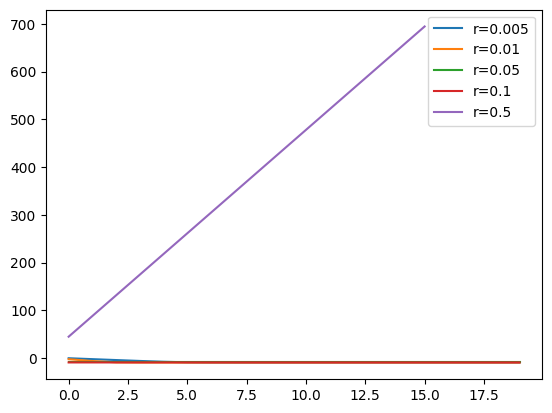

In [46]:
fig = plt.figure()
ax = plt.axes()
for r, mses in res.items():
    # plot them on the same graph
    plt.plot(np.log(mses), label=f'{r=}')
    # plt.show()
plt.legend()

# c)


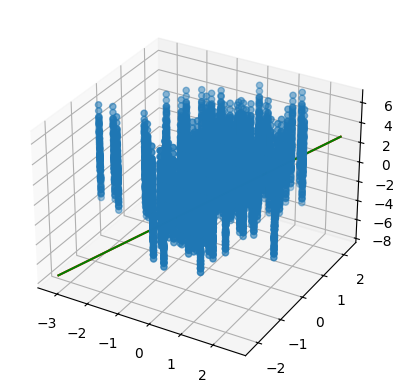

In [32]:
# %matplotlib QtAgg
%matplotlib inline

x1 = X[:,1]
x2 = X[:,2]
d1 = D[:]

# 3d plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, d1)
# plot linear model W_opt
w_opt_x1 = np.linspace(min(x1), max(x1), 100)
w_opt_x2 = np.linspace(min(x2), max(x2), 100)
# plot
ax.plot3D(w_opt_x1, w_opt_x2, W_opt[0]*w_opt_x1 + W_opt[1]*w_opt_x2 + W_opt[2], color='red')

# do the same for W
W_x1 = np.linspace(min(x1), max(x1), 100)
W_x2 = np.linspace(min(x2), max(x2), 100)
ax.plot3D(W_x1, W_x2, W[0]*W_x1 + W[1]*W_x2 + W[2], color='green')

In [29]:
# plot x1 against D
plt.scatter(x=X[:,1], y=D, s=1, color='blue')
# plt.plot(X[:,1], X@W_opt, color='red')
# plt.plot(X[:,1], X@W, color='green')
plt.show()